# Table of Contents

1. [Introduction](#introduction)
2. [Notebook settings](#notebook-settings)
3. [Data Loading, Cleaning and Initial Exploration](#data-loading-cleaning-and-initial-exploration)
4. [Data Preparation](#data-preparation)
5. [EDA](#eda)
6. [Statistical Inference and Hypothesis Testing](#statistical-inference-and-hypothesis-testing)
7. [Model Set-Up, Testing and Evaluation](#model-set-up-testing-and-evaluation)
8. [Applying Hyperparameter Tuning](#applying-hyperparameter-tuning)
9. [Model Set-Up, Testing and Evaluation - After Hyperparameter Tuning](#model-set-up-testing-and-evaluation---after-hyperparameter-tuning)
10. [Comparison of Cross Validation: Before and After Hyperparameter Tuning](#comparison-of-cross-validation-before-and-after-hyperparameter-tuning)
11. [Final Model Selection and Evaluation](#final-model-selection-and-evaluation)
12. [Suggested Improvements](#suggested-improvements)

## Introduction
The goal of this analysis is to predict whether a customer will purchase travel insurance based on their demographic and behavioral data. This analysis will involve data cleaning, exploratory data analysis (EDA), statistical inference, and building supervised machine learning models.

About Dataset<br/>
Context<br/>
- A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.<br/>
- The New Insurance Package Also Includes Covid Cover.<br/>
- The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.<br/>
- The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.<br/>
- The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.<br/>

### Dataset Structure
| Column  | Description | Datatype | Count |
|--|--|--|--|
| Age                   | Age Of The Customer | int64 | 1987 |
| Employment Type       | The Sector In Which Customer Is Employed  | object | 1987 |
| GraduateOrNot         | Whether The Customer Is College Graduate Or Not | object | 1987 |
| AnnualIncome          | The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]  | int64 | 1987 |
| FamilyMembers         | Number Of Members In Customer's Family  | int64 | 1987 |
| ChronicDiseases       | Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.  | int64 | 1987 |
| FrequentFlyer         | Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019]  | object | 1987 |
| EverTravelledAbroad   | Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]  | object | 1987 |

**Target variable:**
| Column  | Description | Datatype | Count |
|--|--|--|--|
| TravelInsurance       | Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019 | int64 | 1987 |

## Approach Overview

- **Target Variable (TravelInsurance):**
  The target variable (TravelInsurance) is categorical, as it indicates whether the customer bought the travel insurance or not. It has two distinct values: 0 = NO and 1 = YES, which corresponds to a binary classification problem.

- **Nature of the Problem:**
  The problem involves determining which customers belong to the “purchased” category versus the “not purchased” category, which clearly fits into a classification problem.

**Summary**

- **Approach:** Classification
- **Model Type:** Binary classification (since the target variable has two possible outcomes: 0 or 1).

- Classification algorithms such as Logistic Regression, Decision Trees, Random Forests, K-Nearest Neighbors (KNN), could be used to approach this.

### Notebook settings

In [1]:
from assets.utils.functions import *

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
from skimpy import skim
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportion_confint
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings

In [3]:
%load_ext pycodestyle_magic
#%reload_ext pycodestyle_magic
%pycodestyle_on
%flake8_on
%flake8_on --max_line_length 79
%matplotlib inline

In [4]:
# Suppress the specific FutureWarning (Sidetable)
warnings.filterwarnings("ignore", category=FutureWarning)

### Data Loading, Cleaning and Initial Exploration

In [5]:
travel_df = pd.read_csv("assets/data/TravelInsurancePrediction.csv")
travel_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
skim(travel_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1987   │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0       │   0 │     0 │     993 │   573.7 │      0 │  496.5 │    993 │    1490 │    1986 │ ▇▇▇▇▇▇ │  │
│ │ Age              │   0 │     0 │   29.65 │   2.913 │     25 │     28 │     29 │      32 │      35 │ ▃▇▂▃▃▅ │  │
│ │ AnnualIncome     │   0 │     0 │  932800 │  376900 │ 300000 │ 600000 │ 900000 │ 1250000 │ 1800000 │ ▆▇▆▇▇▁ │  │
│ │ FamilyMembers    │   0 │     0 │   4.753 │    1.61 │      2 │      4 │      5 │       6 │       9 │ ▇▇▇▅▃▂ │  │
│ │ ChronicDiseases  │   0 │     0 │  0.2778 │   0.448 │      0 │      0 │      0 │       1 │       1 │ ▇    ▃ │  │
│ │ TravelInsurance  │   0 │     0 │  0.3573 │  0.4793 │      0 │      0 │      0 │       1 │       1 │ ▇    ▅ │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Employment Type                      │     0 │         0 │                      2.7 │                 5391 │  │
│ │ GraduateOrNot                        │     0 │         0 │                        1 │                 1987 │  │
│ │ FrequentFlyer                        │     0 │         0 │                        1 │                 1987 │  │
│ │ EverTravelledAbroad                  │     0 │         0 │                        1 │                 1987 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
# Drop irrelevant columns
travel_df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

# Dataframe info and checks
print(travel_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB
None


In [8]:
check_blank_or_whitespace(travel_df)

Count of empty strings or single spaces per column:
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [9]:
travel_df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [10]:
# Check Numerical features statistics
print("Summary Stats (Numerical):")
travel_df.describe(include=np.number).T.round(2)

Summary Stats (Numerical):


,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.65,2.91,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.96,376855.68,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.75,1.61,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.28,0.45,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.36,0.48,0.0,0.0,0.0,1.0,1.0


In [11]:
# Check Object/categorical features statistics
print("Summary Stats (Categorical):")
travel_df.describe(include="object").T.round(2)

Summary Stats (Categorical):


,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


In [12]:
travel_df.stb.freq(['TravelInsurance'], cum_cols=False)

,TravelInsurance,count,percent
0,0,1277,64.26774
1,1,710,35.73226


Superficial analysis over the target varianle shows that a majority of people chose not to buy travel insurance, although a significant portion, over a third, did opt to purchase it.

### Checking for duplicates

In [13]:
# Prints only subsequent occurrences of duplicates, ignoring the first one
print(f"\nNumber of duplicate rows: {travel_df.duplicated().sum()}")


Number of duplicate rows: 738


We identified 738 duplicate rows in the dataset. To decide on how to handle these, we analyzed the frequency of occurrences at various thresholds. Duplicates may represent either different customers with identical characteristics or the same customer traveling multiple times. Ignoring these duplicates could bias the model, particularly given the small dataset size (1987 records), potentially leading to overfitting and poor generalization on unseen data.

By removing duplicates based on demographic and behavioral features (e.g., Age, Employment Type, Income, Family Members, etc.), we aim to reduce redundancy and ensure the model trains on diverse, meaningful data. This approach minimizes the risk of overfitting while preserving data diversity to improve model performance.

But to decide whether the duplicates should be removed, we need to analyze the frequency of occurrences at various thresholds, as per the code results below:

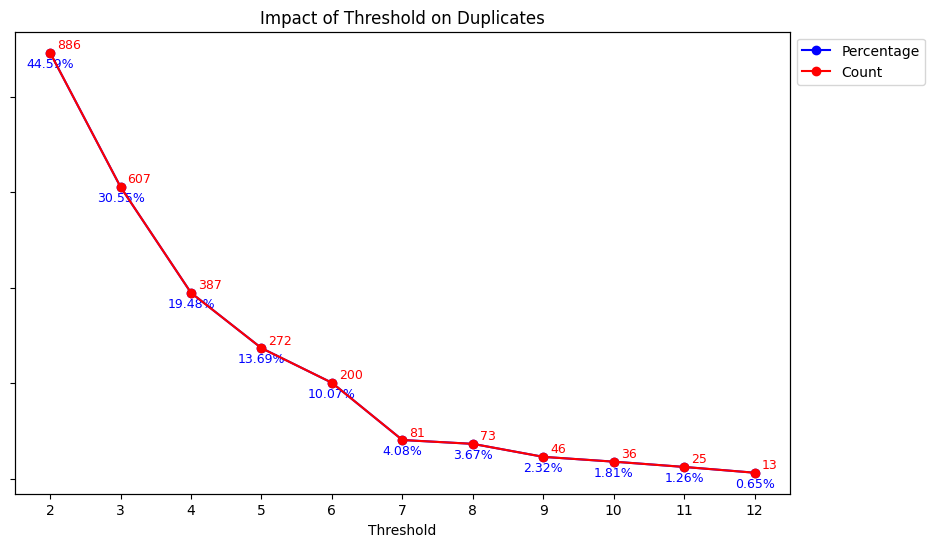

In [14]:
# Check duplicates by ages and count_thresholds
features_to_check = ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
                     'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
                     'EverTravelledAbroad']
count_thresholds = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
duplicate_occurrences(travel_df, features_to_check, count_thresholds,
                      suppress_output=True)

### Decision Regarding Duplicates
The above plot shows the impact of different thresholds on the removal of duplicate records within the dataset. The dataset contains 1,987 records, and as the threshold increases, the number of duplicates decreases significantly, as illustrated by both the red line (indicating the count of duplicates) and the blue line (indicating the percentage of the dataset affected).

- At a lower threshold (e.g., threshold 2), removing duplicates would result in a 44.59% reduction in the dataset, eliminating 886 records.
- By the time the threshold reaches 9, the number of duplicates removed drops to 46 records, impacting only 2.32% of the dataset.

Given that the dataset is relatively small (only 1,987 records), removing a significant portion of it might reduce the diversity of the data and negatively impact the model's generalizability. While removing duplicates could potentially help improve the performance of the machine learning model by eliminating redundant or noisy data, the gains from such an enhancement may not be substantial enough to justify the loss of valuable data points.

Furthermore, as the percentage of duplicates decreases significantly at higher thresholds, the improvement in model performance from duplicate removal is likely to diminish. With only a small percentage of duplicates at higher thresholds, the impact on the model’s performance might be minimal.

In conclusion, while duplicate removal might have some benefit, in this particular case, the small size of the dataset and the diminishing returns at higher thresholds suggest that retaining duplicates is a reasonable decision. This ensures that the dataset remains as robust and diverse as possible, preserving valuable information.

## Data Preparation

### Grouping:
Since grouping the continuous variables into bins will help in better analysis, I decided to group it into three categories for better analysis:

- Age: Grouped into 3 distinct bins, as 25-27, 28-30, and 31-35 for easier comparison across age ranges.
- Annual Income: Divided into 3 distinct bins, as 300K-800K, 800K-1.3M, and 1.3M-1.8M income brackets.
- Family Members: Grouped into 3 distinct bins, as 2-3, 4-5, and 6-9 members to simplify family size analysis.

This grouping will be used in the EDA section to provide a clearer picture of the data distribution and relationships between variables.

In [15]:
# Group Age
age_bins = [25, 28, 31, 35]  # Age groups
age_labels = ['25-27', '28-30', '31-35']  # Labels
travel_df['AgeGroup'] = pd.cut(travel_df['Age'],
                               bins=age_bins,
                               labels=age_labels,
                               right=False)

# Group AnnualIncome
income_bins = [300000, 800000, 1300000, 1800000]  # Income groups
income_labels = ['300K-800K', '800K-1.3M', '1.3M-1.8M']  # Labels
travel_df['IncomeGroup'] = pd.cut(travel_df['AnnualIncome'],
                                  bins=income_bins,
                                  labels=income_labels,
                                  right=False)

# Group FamilyMembers
family_bins = [2, 4, 6, 9]  # Family groups
family_labels = ['2-3', '4-5', '6-9']  # Labels
travel_df['FamilyGroup'] = pd.cut(travel_df['FamilyMembers'],
                                  bins=family_bins,
                                  labels=family_labels,
                                  right=False)

# Check the new grouped columns
print(travel_df.head().to_string())

   Age               Employment Type GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  TravelInsurance AgeGroup IncomeGroup FamilyGroup
0   31             Government Sector           Yes        400000              6                1            No                  No                0    31-35   300K-800K         6-9
1   31  Private Sector/Self Employed           Yes       1250000              7                0            No                  No                0    31-35   800K-1.3M         6-9
2   34  Private Sector/Self Employed           Yes        500000              4                1            No                  No                1    31-35   300K-800K         4-5
3   28  Private Sector/Self Employed           Yes        700000              3                1            No                  No                0    28-30   300K-800K         2-3
4   28  Private Sector/Self Employed           Yes        700000              8                

### Dtype changes - object to category

Categorical dtypes are more memory-efficient than object dtypes. By knowing that, we will convert object columns to categorical where appropriate. This will help reduce the memory usage of the DataFrame.

In [16]:
# Convert categorical columns to 'category' dtype
categorical_columns = ['Employment Type', 'GraduateOrNot',
                       'FrequentFlyer', 'EverTravelledAbroad']
travel_df[categorical_columns] = travel_df[
    categorical_columns].astype('category')

# Verify changes
print(travel_df.dtypes)

Age                       int64
Employment Type        category
GraduateOrNot          category
AnnualIncome              int64
FamilyMembers             int64
ChronicDiseases           int64
FrequentFlyer          category
EverTravelledAbroad    category
TravelInsurance           int64
AgeGroup               category
IncomeGroup            category
FamilyGroup            category
dtype: object


## EDA

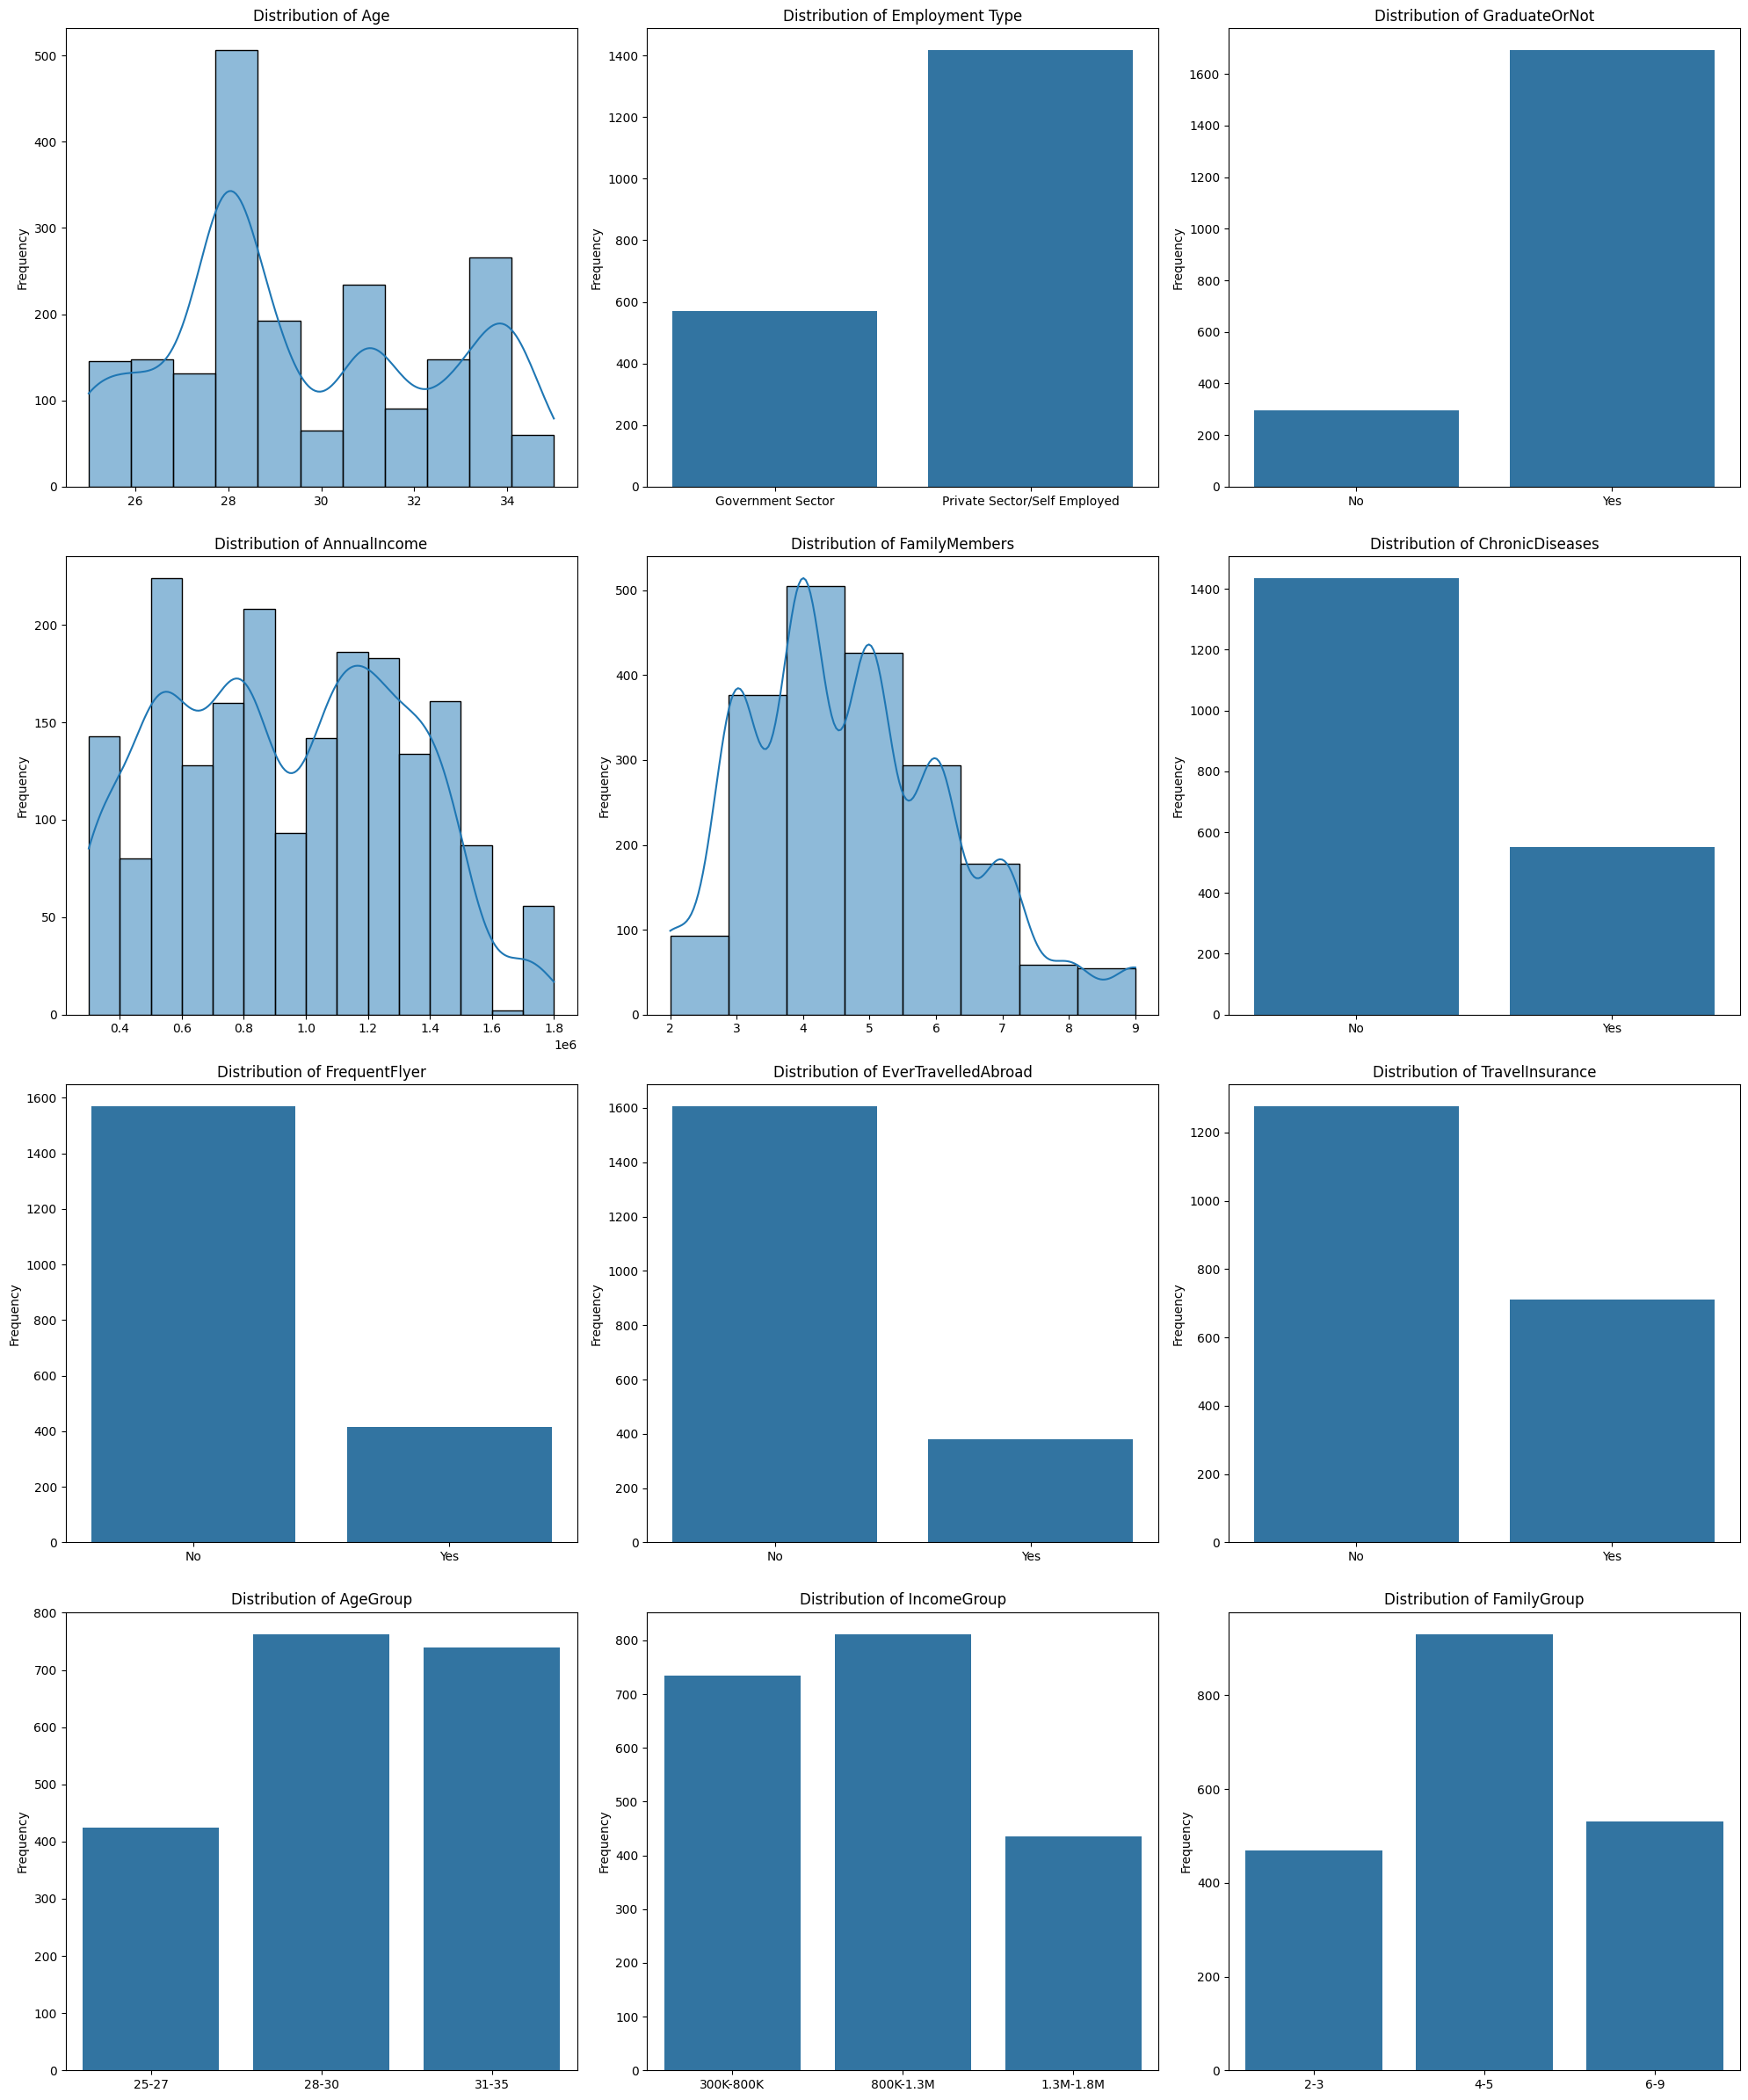

In [17]:
plot_univariate(travel_df)

### Summary
The dataset shows a diverse range of distributions across the features, with some features (such as Age, AnnualIncome, and FamilyMembers) exhibiting multimodal or skewed distributions. Other categorical features (like Employment Type, GraduateOrNot, and TravelInsurance) show more pronounced differences between categories, with the majority of the population concentrated in one category. This information helps in understanding the underlying population and identifying trends that may be relevant for further analysis.

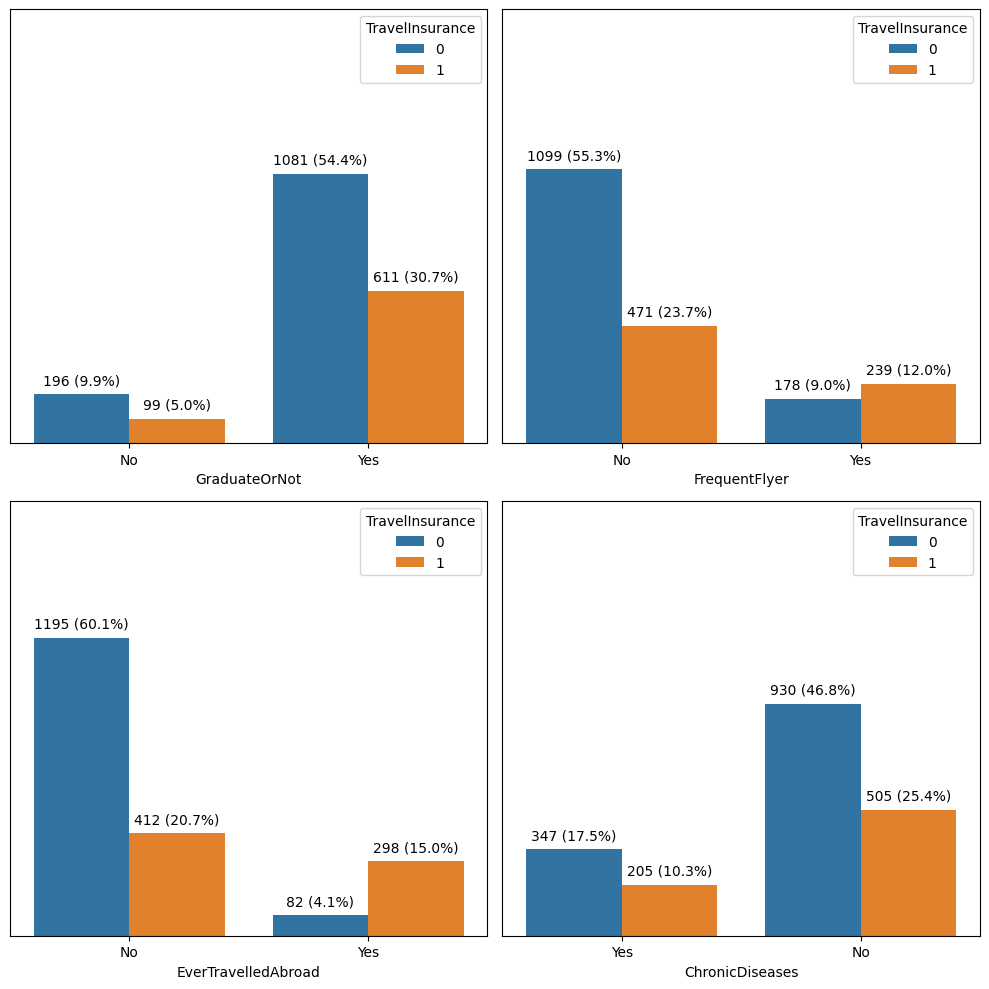

In [18]:
plot_hist_categorical(travel_df)

### Summary
- GraduateOrNot:
  - A higher percentage of graduates (Yes) purchased travel insurance (30.7%) compared to non-graduates (No, 5.0%).
  - However, the majority of both graduates and non-graduates did not purchase travel insurance.
- FrequentFlyer:
  - Frequent flyers (Yes) are more likely to purchase travel insurance (12.0%) compared to those who are not frequent flyers (No, 9.0%).
  - Still, a significant portion of frequent flyers did not purchase travel insurance.
- EverTravelledAbroad:
  - Individuals who have traveled abroad are more likely to purchase travel insurance (15.0%) compared to those who have not (4.1%).
  - Despite this, the majority of people, both those who have and haven’t traveled abroad, did not purchase insurance.
- ChronicDiseases:
  - People without chronic diseases are more likely to purchase travel insurance (25.4%) compared to those with chronic diseases (10.3%).
  - However, again, a large portion of both groups did not purchase insurance.

Across all categories, a consistent trend emerges where those with more travel-related experience or fewer health concerns (graduates, frequent flyers, those who have traveled abroad, and those without chronic diseases) are somewhat more likely to purchase travel insurance. However, the overall percentage of people purchasing insurance remains relatively low across all groups, indicating that other factors might also be influencing the decision to buy travel insurance.

### Analysing grouped features

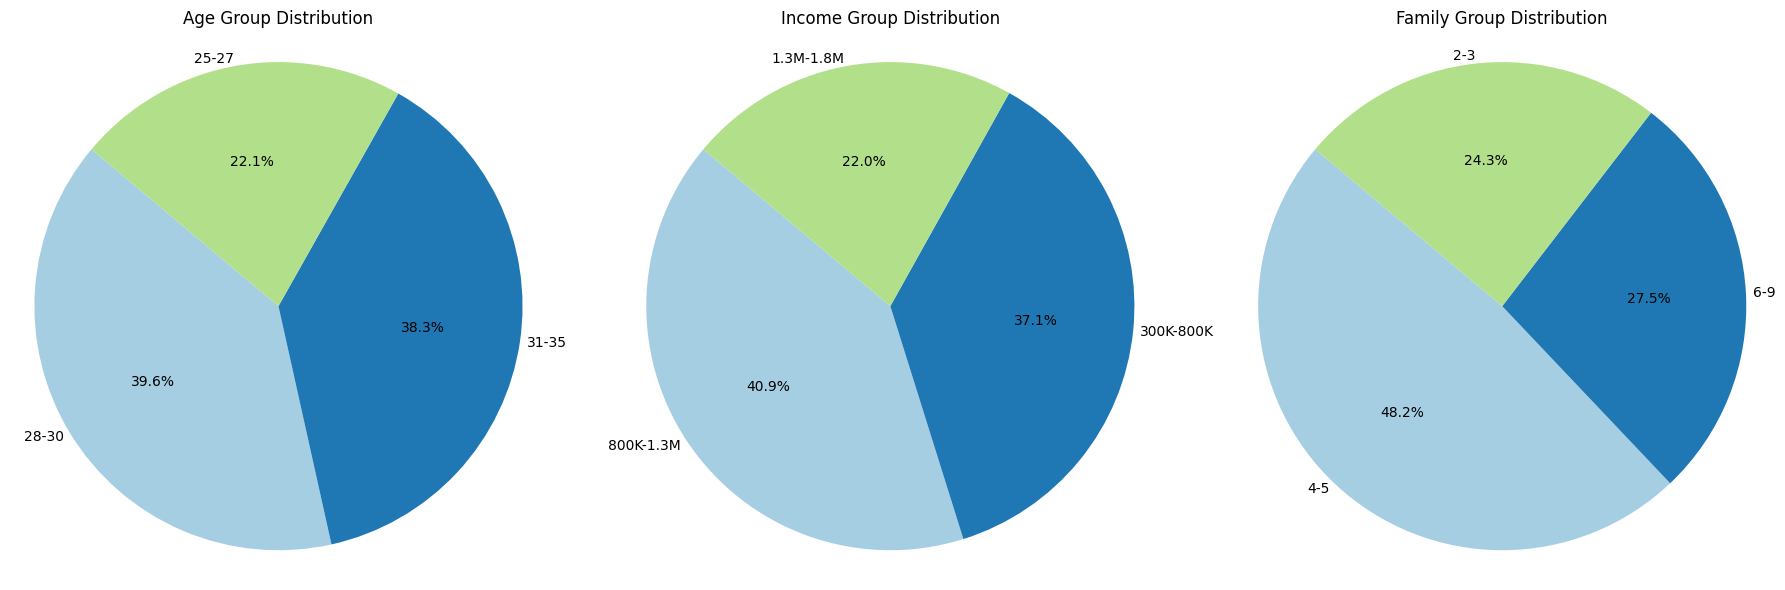

In [19]:
# Grouped pie plots
pieplot_group(travel_df, ['AgeGroup', 'IncomeGroup', 'FamilyGroup'],
              ['Age Group Distribution', 'Income Group Distribution',
               'Family Group Distribution'])

### Summary

The dataset primarily consists of:<br/>
- individuals who are aged 28-35 years<br/>
- income in the range of 800K-1.3M<br/>
- family members within 4-5 individuals.<br/>
  
This distribution helps to define the central characteristics of the population being analyzed.

Now we want to see how the target variable (TravelInsurance) is distributed across these grouped features. This will help us understand the relationship between the target variable and the demographic/behavioral features.

## Analysing grouped features with target variable(TravelInsurance)

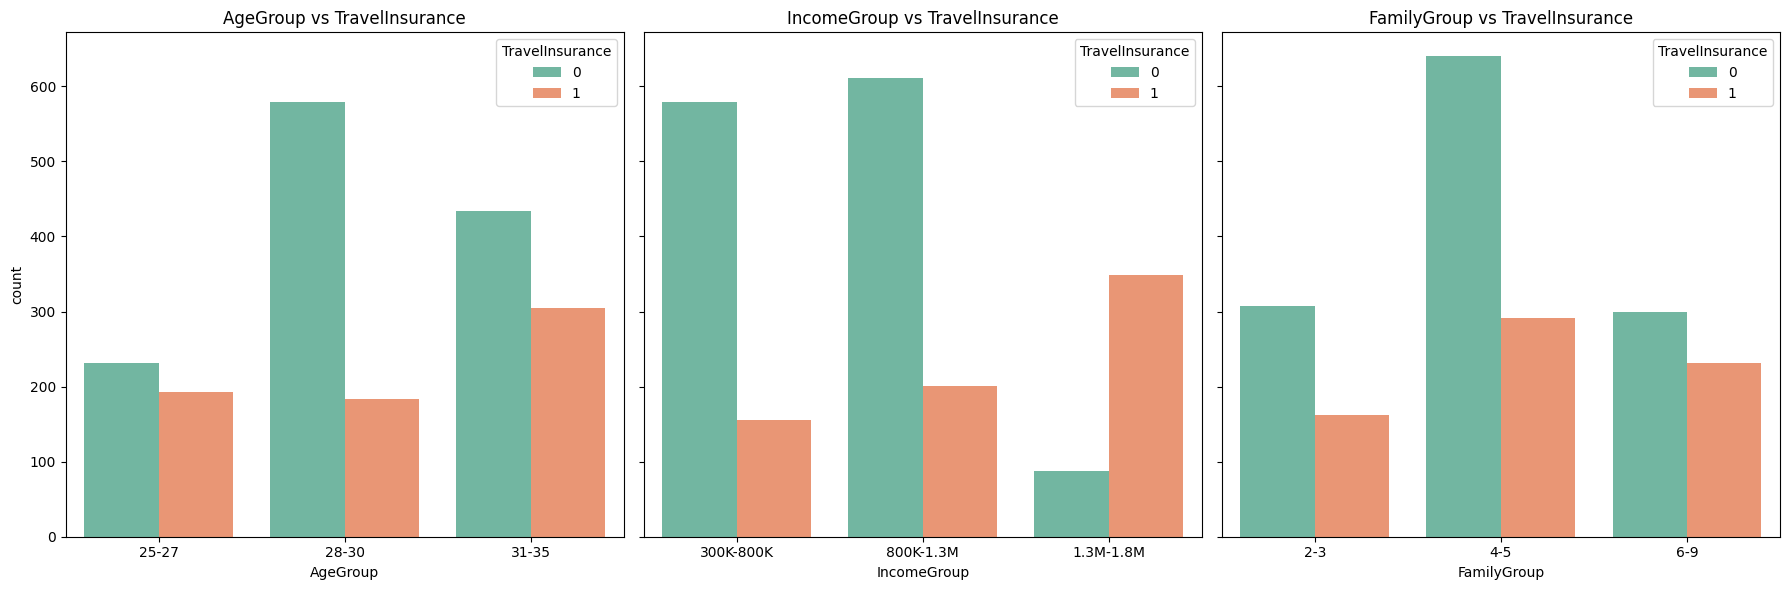

In [20]:
# Grouped columns and target variable
grouped_columns = ['AgeGroup', 'IncomeGroup', 'FamilyGroup']
target_column = 'TravelInsurance'

# Bivariate relationships between grouped features and TravelInsurance
bivariate_countplots(travel_df, grouped_columns, target_column)

### Summary

- **Age Group vs. Travel Insurance Insights:**
Individuals in the older age group (28-35) are slightly more likely to not purchase travel insurance, while the younger group (25-27) is more balanced between purchasing and not purchasing.

- **Income Group vs. Travel Insurance Insights:**
Higher income groups (1.3M-1.8M) tend to purchase travel insurance more often, while those in lower income groups (300K-800K) are less likely to do so and the middle-income group (800K-1.3M) follows a similar trend.

- **Family Group vs. Travel Insurance Insights:**
Larger families (6-9 members) seem more inclined to purchase travel insurance, while smaller families (2-3 members) are less likely to do so. Also, the middle group (4-5 members) shows a similar trend, in not purchasing travel insurance.


## Outlier Detection and Visualization

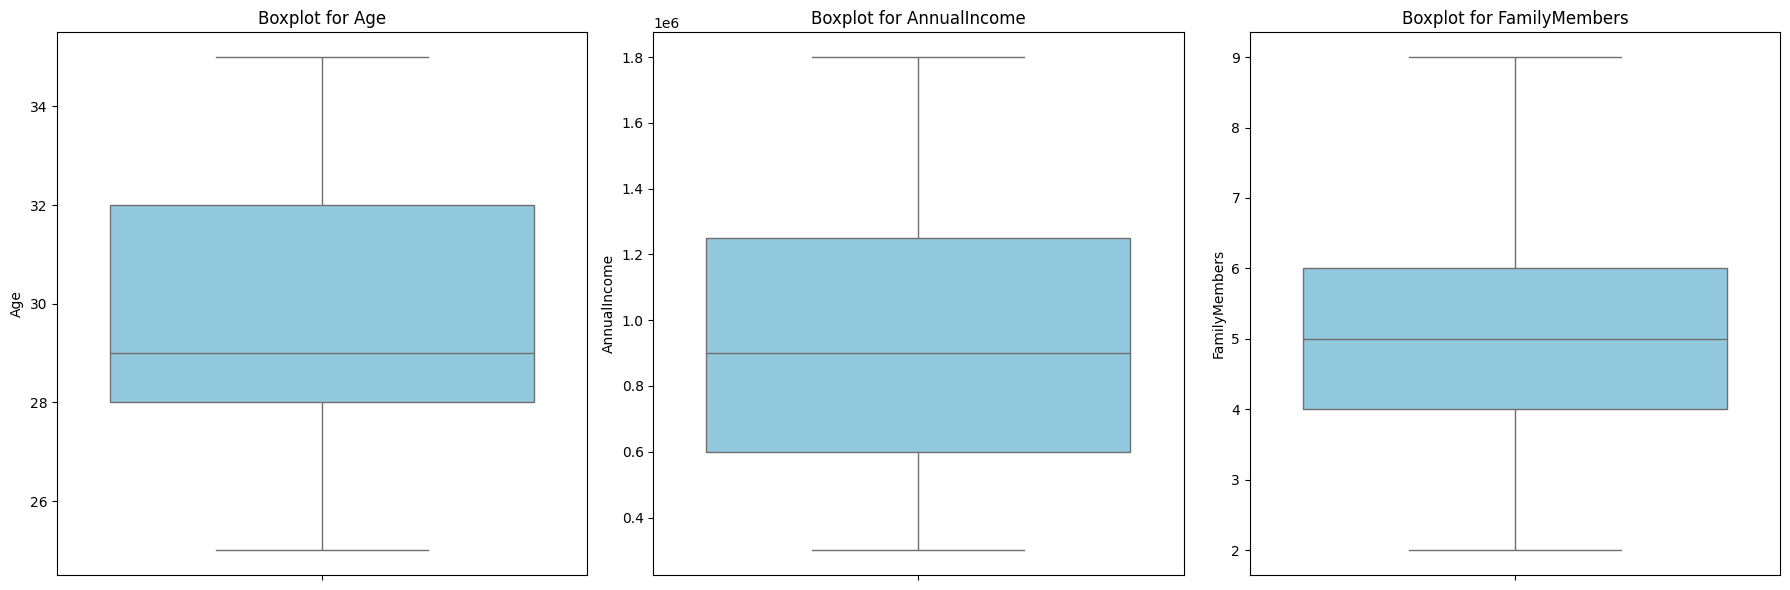

In [21]:
# Continuous columns for boxplots
continuous_columns = ['Age', 'AnnualIncome', 'FamilyMembers']

# Create subplots for boxplots of continuous columns
fig, axes = plt.subplots(1, len(continuous_columns), figsize=(18, 6))
for i, col in enumerate(continuous_columns):
    sns.boxplot(y=travel_df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Conclusion
- Outliers: None of the variables display any outliers, as no points fall beyond the whiskers.<br/>
- Distribution: All three variables appeared relatively symmetrical in terms of the quartiles. The variables are symmetrically distributet in this terms (IQR).

## Encoding and Correlation Analysis
The next step is create a new dataframe having the encoding process. This is a vital preprocessing step in preparing categorical variables for machine learning models. It transforms the dataset into a numerical format suitable for ML algorithms while preserving the categorical nature of the data, thus enabling efficient and accurate model training.

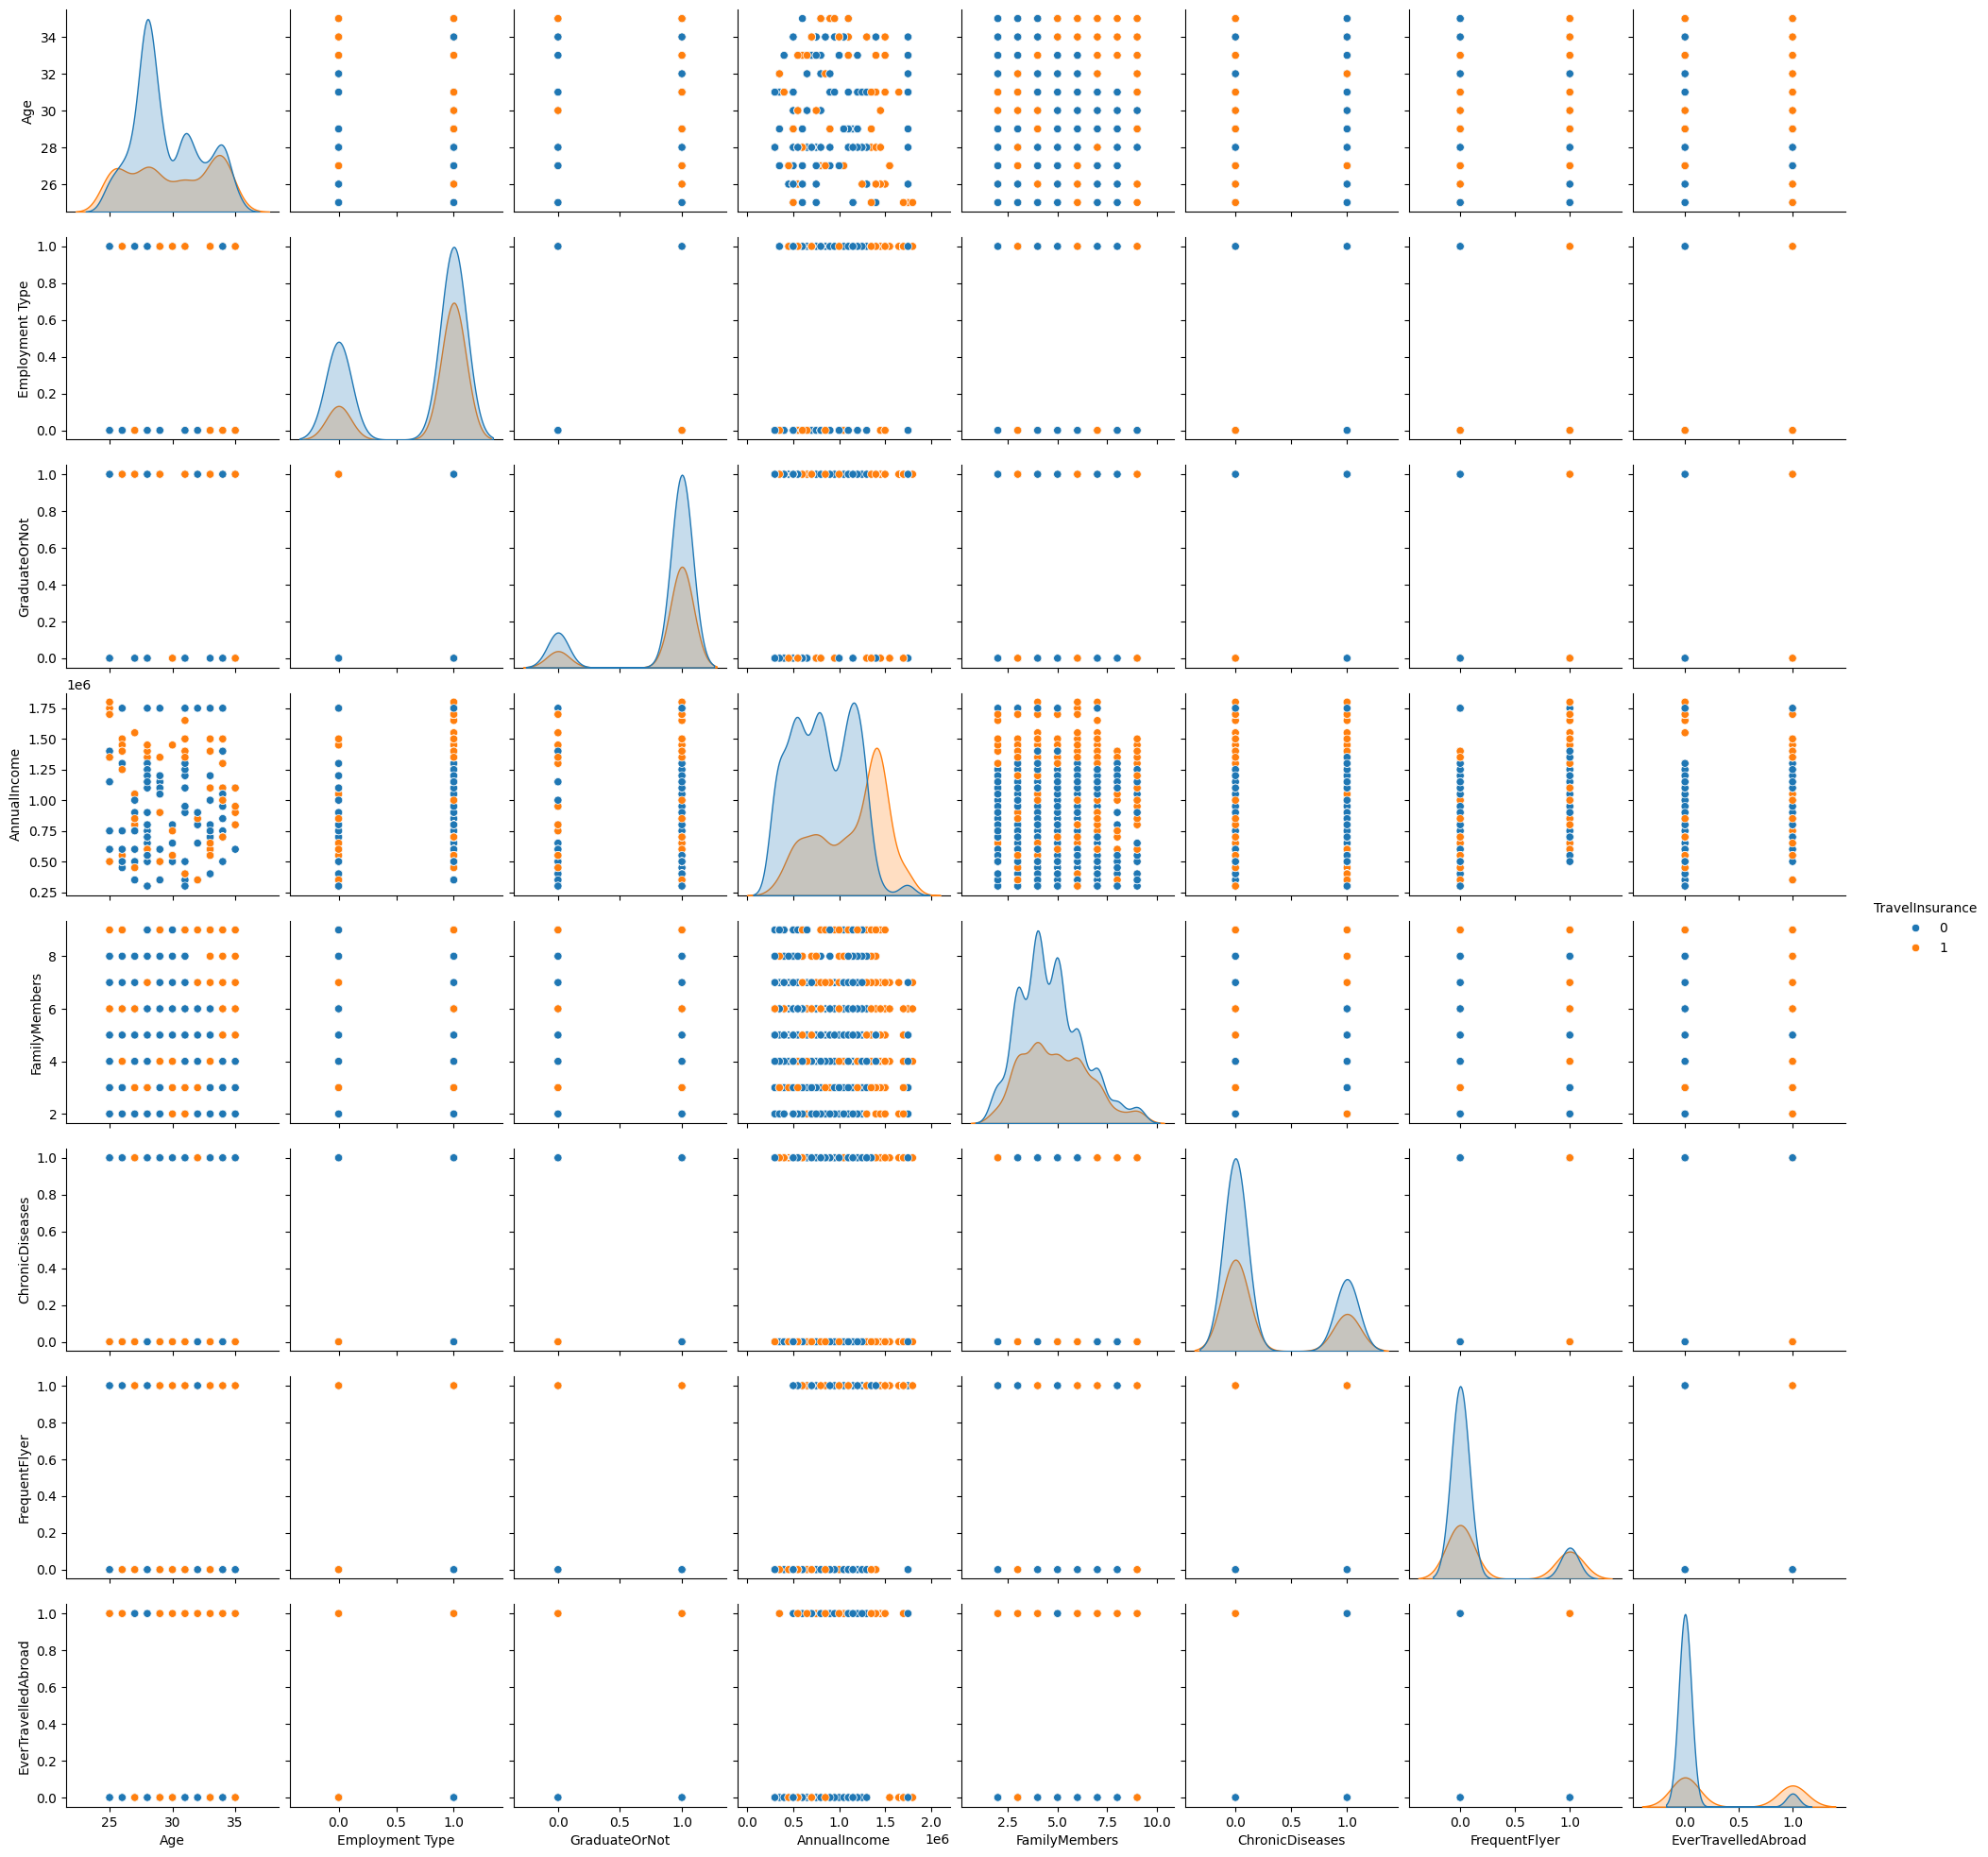

In [22]:
# Encoding categorical columns into numerical
encoded_df = travel_df.copy()
encoded_df = encoded_df.drop(columns=['AgeGroup', 'IncomeGroup',
                                      'FamilyGroup'])

encoded_df['GraduateOrNot'] = encoded_df[
    'GraduateOrNot'].map({'Yes': 1, 'No': 0}).astype(int)
encoded_df['FrequentFlyer'] = encoded_df[
    'FrequentFlyer'].map({'Yes': 1, 'No': 0}).astype(int)
encoded_df['EverTravelledAbroad'] = encoded_df[
    'EverTravelledAbroad'].map({'Yes': 1, 'No': 0}).astype(int)
encoded_df['ChronicDiseases'] = encoded_df[
    'ChronicDiseases'].map({'Yes': 1, 'No': 0}).astype(int)
encoded_df['Employment Type'] = encoded_df[
    'Employment Type'].map({'Government Sector': 0,
                            'Private Sector/Self Employed': 1}).astype(int)

# Pairplot to visualize relationships
sns.pairplot(encoded_df, hue='TravelInsurance')
plt.show()

**Highlight points:**

- **Age x EverTravelledAbroad:** 
  - from 28 years old, all people that have traveled abroad purchased the insurance.
  
- **Employment Type x FrequentFlyer:** 
  - just the private sector that are not frequent flyers, did not purchased the insurance. This suggests that frequent travelers recognize the value of travel insurance and are more likely to purchase it. Same pattern for EverTravelledAbroad with Employment Type (private sector that have not traveled abroad did not purchased the insurance). The logic behind this could be that people who have traveled internationally are more aware of the risks involved and the benefits of having travel insurance, making them more likely to purchase it.

- **AnnualIncome:** 
  - In the pairplot, there is some visible separation between those who purchased travel insurance (1 in orange) and those who did not (0 in blue). Specifically, higher income levels seem to have a higher proportion of individuals who bought travel insurance. This indicates that income might be a factor influencing the decision to buy travel insurance.

**Association with Travel Insurance:**
These features directly relate to behaviors and factors that logically influence the need for travel insurance:
- Income affects one's ability to purchase additional services like insurance.
- FrequentFlyer status might indicate more travel, hence a higher perceived need for insurance.
- EverTravelledAbroad implies exposure to international travel, where insurance is often considered more essential.

In [23]:
encoded_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


### Correlation Analysis

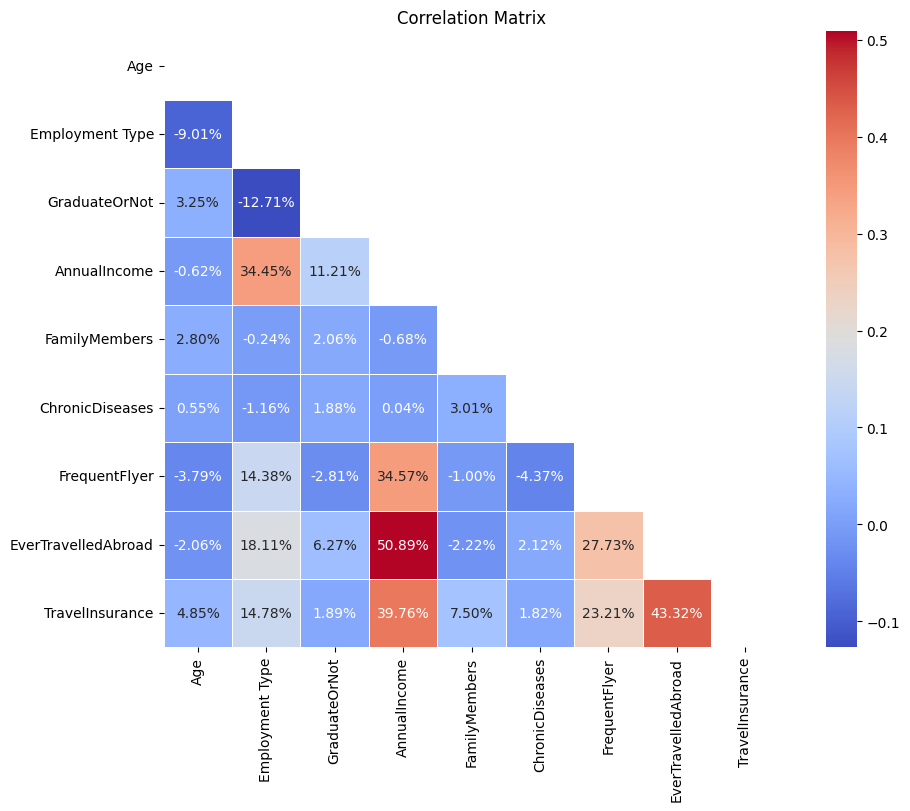

In [24]:
# Correlation matrix and heatmap
corr_matrix = encoded_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask,
            annot=True, fmt=".2%",
            cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Multicollinearity Check (VIF)

In [25]:
# Checking for multicollinearity using VIF
vif_result = calculate_vif(encoded_df.drop(columns='TravelInsurance'))
print(vif_result)

               Feature       VIF
0                  Age  1.015369
1      Employment Type  1.191133
2        GraduateOrNot  1.050756
3         AnnualIncome  1.570125
4        FamilyMembers  1.002788
5      ChronicDiseases  1.004206
6        FrequentFlyer  1.171943
7  EverTravelledAbroad  1.334016


**Summary:**

Overall, all VIF values are well below the threshold of 5, indicating that multicollinearity is not a significant issue in this dataset.<br/>
Each feature is relatively independent, allowing me to include them in the analysis without major concerns about redundancy or inflated variance.

## Statistical Inference and Hypothesis Testing

In [26]:
# Hypothesis Testing - T-Test on Annual Income
t_stat, p_value = ttest_ind(
    travel_df[travel_df['TravelInsurance'] == 1]['AnnualIncome'],
    travel_df[travel_df['TravelInsurance'] == 0]['AnnualIncome']
)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis - significant difference in annual "
          "income between the two groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference in "
          "annual income between the two groups.")

T-Statistic: 19.257785253687544, P-Value: 6.63501776035329e-76
Reject the null hypothesis - significant difference in annual income between the two groups.


In [27]:
# Hypothesis Testing - Chi-Square on Frequent Flyer status on Travel Insurance
contingency_table_ff = pd.crosstab(
    travel_df['FrequentFlyer'], travel_df['TravelInsurance'])
chi2_ff, p_value_ff, dof_ff, expected_ff = chi2_contingency(
    contingency_table_ff)

print(f"Chi-Square Statistic for Frequent Flyer: {chi2_ff}, "
      f"P-Value: {p_value_ff}")

if p_value_ff < 0.05:
    print("Reject the null hypothesis - significant association between "
          "Frequent Flyer status and Travel Insurance.")
else:
    print("Fail to reject the null hypothesis - no significant association "
          "between Frequent Flyer status and Travel Insurance.")

Chi-Square Statistic for Frequent Flyer: 105.85723074203977, P-Value: 7.924360415064537e-25
Reject the null hypothesis - significant association between Frequent Flyer status and Travel Insurance.


In [28]:
# Hypothesis Testing - T-Test on 'Age'
t_stat_age, p_value_age = ttest_ind(
    travel_df[travel_df['TravelInsurance'] == 1]['Age'],
    travel_df[travel_df['TravelInsurance'] == 0]['Age']
)
print(f"T-Statistic for Age: {t_stat_age}, P-Value: {p_value_age}")

if p_value_age < 0.05:
    print("Reject the null hypothesis - significant difference in Age between "
          "the two groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference in "
          "Age between the two groups.")

T-Statistic for Age: 2.7255058475523968, P-Value: 0.006476683978749601
Reject the null hypothesis - significant difference in Age between the two groups.


**Hypotesis Testing Analysis**

- **Annual Income:**
  - The T-test shows a highly significant difference in annual income between customers who purchased travel insurance and those who did not, indicating that income plays a crucial role in the decision to buy travel insurance.

- **Frequent Flyer Status:**
  - The Chi-Square test reveals a strong association between frequent flyer status and the likelihood of purchasing travel insurance. Frequent flyers are significantly more likely to purchase insurance, highlighting the impact of travel habits.

- **Age:**
  - The T-test for age shows a significant difference between the two groups, suggesting that age is also an influential factor in the decision to purchase travel insurance, albeit less pronounced than income or frequent flyer status.

## Model Set-Up, Testing and Evaluation

### Train-Test Split and Standardization

In [29]:
# Train-Test Split
X = encoded_df.drop(columns='TravelInsurance')
y = encoded_df['TravelInsurance']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation

In [30]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train models
log_reg.fit(X_train_scaled, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg_train = log_reg.predict(X_train_scaled)
y_pred_dt_train = dt_model.predict(X_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_knn_train = knn_model.predict(X_train_scaled)

# Predictions on test set
y_pred_logreg_test = log_reg.predict(X_test_scaled)
y_pred_dt_test = dt_model.predict(X_test)
y_pred_rf_test = rf_model.predict(X_test)
y_pred_knn_test = knn_model.predict(X_test_scaled)

# Evaluate models using classification reports
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg_test))

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt_test))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_test))

print("K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn_test))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       257
           1       0.77      0.50      0.60       141

    accuracy                           0.77       398
   macro avg       0.77      0.71      0.72       398
weighted avg       0.77      0.77      0.75       398

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       257
           1       0.78      0.66      0.71       141

    accuracy                           0.81       398
   macro avg       0.80      0.78      0.79       398
weighted avg       0.81      0.81      0.81       398

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       257
           1       0.79      0.65      0.71       141

    accuracy                           0.81       398
   macro avg       0.81      0.78      0.

**Overview:**

- Logistic Regression:
  - Accuracy: 77%
  - Overall: The model is more effective at identifying non-buyers than buyers, resulting in a slight imbalance in prediction accuracy across classes.
  
- Decision Tree:
  - Accuracy: 81%
  - Overall: The Decision Tree model performs better overall, especially in classifying non-buyers, with a slight improvement in buyer identification compared to Logistic Regression.

- Random Forest:
  - Accuracy: 81%
  - Overall: Random Forest offers a good balance between precision and recall, particularly strong in identifying non-buyers, with consistent performance across both classes.

- K-Nearest Neighbors:
  - Accuracy: 77%
  - Overall: K-Nearest Neighbors performs similarly to Logistic Regression, with better precision for non-buyers but challenges in classifying buyers.

- **Summary:**<br/>
  - Best Model: The Decision Tree and Random Forest models are the most balanced, both achieving 81% accuracy and better F1-scores for class 1 than Logistic Regression and KNN.<br/>
  - Challenges: All models struggle with classifying buyers (class 1), particularly in recall, which suggests further tuning or different modeling techniques might be needed to improve performance for this group.

## Evaluating Model Generalization Through Training and Test Accuracy

In this part, I wanted to calculate and compare the training accuracy and test accuracy for four different machine learning models: Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors.

- **Training Accuracy:** measures how well the model performs on the data it was trained on. A high training accuracy suggests that the model has learned the patterns in the training data well.

- **Test Accuracy:** evaluates the model's performance on unseen data (the test set). This accuracy provides insight into how well the model generalizes to new, unseen examples.

In [31]:
# Calculate and print training and test accuracy
train_accuracy_logreg = accuracy_score(y_train, y_pred_logreg_train)
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg_test)

train_accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)

train_accuracy_knn = accuracy_score(y_train, y_pred_knn_train)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print(f"Logistic Regression - Training Accuracy: {train_accuracy_logreg:.4f}, "
      f"Test Accuracy: {test_accuracy_logreg:.4f}")
print(f"Decision Tree - Training Accuracy: {train_accuracy_dt:.4f}, "
      f"Test Accuracy: {test_accuracy_dt:.4f}")
print(f"Random Forest - Training Accuracy: {train_accuracy_rf:.4f}, "
      f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"K-Nearest Neighbors - Training Accuracy: {train_accuracy_knn:.4f}, "
      f"Test Accuracy: {test_accuracy_knn:.4f}")

Logistic Regression - Training Accuracy: 0.7753, Test Accuracy: 0.7688
Decision Tree - Training Accuracy: 0.9226, Test Accuracy: 0.8116
Random Forest - Training Accuracy: 0.9226, Test Accuracy: 0.8141
K-Nearest Neighbors - Training Accuracy: 0.8408, Test Accuracy: 0.7714


**Overview**

- Logistic Regression:
  - Insight: The model is well-balanced, with similar training and test accuracy, indicating good generalization.

- Decision Tree:
  - Insight: The model shows signs of overfitting, with high training accuracy but a noticeable drop in test accuracy.

- Random Forest:
  - Insight: Similar to the Decision Tree, though slightly better test accuracy. Potential overfitting is less pronounced due to ensemble averaging.

- K-Nearest Neighbors:
  - Insight: The model is relatively balanced but shows a slight overfit, with training accuracy somewhat higher than test accuracy.

**Summary:**

- Best Generalization: Logistic Regression and K-Nearest Neighbors.
- Potential Overfitting: Decision Tree and Random Forest models exhibit overfitting, though Random Forest is better at mitigating it.

Even presenting potential overfitting to some models, I decided to keep the analysis with all the models and at the end, provide a comparison between the models with overfitting and the ones that will be adjusted.

### Confusion Matrices and ROC Curves

In [32]:
# Confusion matrices
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg_test))

print("Confusion Matrix - Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt_test))

print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf_test))

print("Confusion Matrix - K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn_test))

# ROC Curves and AUC Scores
fpr_logreg, tpr_logreg, _ = roc_curve(
    y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(
    y_test, dt_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(
    y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(
    y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

roc_auc_logreg = roc_auc_score(
    y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = roc_auc_score(
    y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(
    y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_knn = roc_auc_score(
    y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

Confusion Matrix - Logistic Regression:
[[236  21]
 [ 71  70]]
Confusion Matrix - Decision Tree:
[[230  27]
 [ 48  93]]
Confusion Matrix - Random Forest:
[[233  24]
 [ 50  91]]
Confusion Matrix - K-Nearest Neighbors:
[[230  27]
 [ 64  77]]


**Summary:**

- **Logistic Regression:**
    - True Negatives (TN): 236
    - False Positives (FP): 21
    - False Negatives (FN): 71
    - True Positives (TP): 70<br/>
> Insight: The model correctly classifies most non-buyers (TN) but struggles with correctly identifying buyers (TP), resulting in a higher number of false negatives.

- **Decision Tree:**
    - True Negatives (TN): 230
    - False Positives (FP): 27
    - False Negatives (FN): 48
    - True Positives (TP): 93
> Insight: The Decision Tree improves buyer identification (higher TP) compared to Logistic Regression, though it slightly increases the number of false positives.

- **Random Forest:**
    - True Negatives (TN): 233
    - False Positives (FP): 24
    - False Negatives (FN): 50
    - True Positives (TP): 91
> Insight: Random Forest offers a good balance between identifying buyers and non-buyers, reducing both false positives and false negatives compared to the Decision Tree.

- **K-Nearest Neighbors:**
    - True Negatives (TN): 230
    - False Positives (FP): 27
    - False Negatives (FN): 64
    - True Positives (TP): 77
> Insight: K-Nearest Neighbors performs similarly to Logistic Regression but slightly better at identifying buyers, though it still has a significant number of false negatives.

**Overall Summary:**
- Best for Identifying Buyers (TP): Decision Tree and Random Forest models.
- Best for Reducing False Negatives (FN): Decision Tree and Random Forest, with a trade-off of slightly higher false positives.
- Balanced Performance: Random Forest provides the best balance between minimizing both false positives and false negatives.

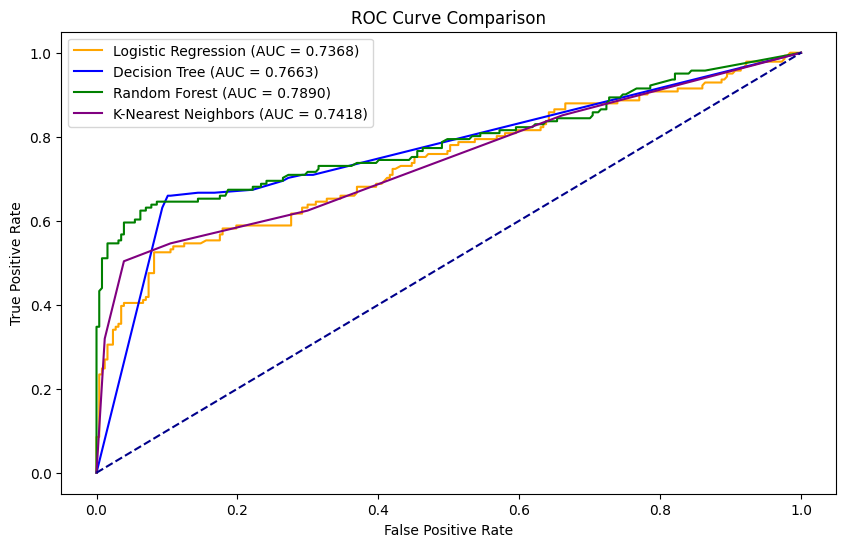

In [33]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg,
         label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})',
         color='orange')
plt.plot(fpr_dt, tpr_dt,
         label=f'Decision Tree (AUC = {roc_auc_dt:.4f})',
         color='blue')
plt.plot(fpr_rf, tpr_rf,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})',
         color='green')
plt.plot(fpr_knn, tpr_knn,
         label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.4f})',
         color='purple')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

**Insights from the ROC Curve Comparison:**
- **AUC** (Area Under the ROC Curve): Measures the ability of a model to distinguish between classes. A higher AUC value indicates better model performance in distinguishing between positive and negative classes.
- **ROC** (Receiver Operating Characteristic): Plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings.

**Analysis:**
- Random Forest has the highest AUC (0.7890), indicating it has the best overall performance in distinguishing between classes.
- Decision Tree follows with an AUC of 0.7663, showing it is also relatively effective, though slightly less so than Random Forest.
- K-Nearest Neighbors (KNN) has an AUC of 0.7418, performing better than Logistic Regression but still lagging behind the tree-based models.
- Logistic Regression has the lowest AUC (0.7368), suggesting it is the least effective at differentiating between the classes in this comparison.

**Summary:**
- Best Model: Random Forest, due to its superior AUC, making it the most reliable model in this comparison.
- Tree-Based Models: Both Decision Tree and Random Forest outperform KNN and Logistic Regression, indicating that tree-based approaches might be more suited for this dataset.
- KNN and Logistic Regression perform similarly, with Logistic Regression slightly underperforming in terms of AUC.

### Confidence Intervals for Model Accuracy

In [34]:
# Calculate confidence intervals for accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

n = len(y_test)  # Sample size
ci_logreg = proportion_confint(
    int(accuracy_logreg * n), n, alpha=0.05, method='normal')
ci_dt = proportion_confint(
    int(accuracy_dt * n), n, alpha=0.05, method='normal')
ci_rf = proportion_confint(
    int(accuracy_rf * n), n, alpha=0.05, method='normal')
ci_knn = proportion_confint(
    int(accuracy_knn * n), n, alpha=0.05, method='normal')

print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}, "
      f"Confidence Interval: {ci_logreg}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}, "
      f"Confidence Interval: {ci_dt}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, "
      f"Confidence Interval: {ci_rf}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}, "
      f"Confidence Interval: {ci_knn}")

Logistic Regression Accuracy: 0.7688, Confidence Interval: (0.7274272714756453, 0.8102611707354099)
Decision Tree Accuracy: 0.8116, Confidence Interval: (0.7731379645262779, 0.8499776133631693)
Random Forest Accuracy: 0.8141, Confidence Interval: (0.7758484890777377, 0.8522922144398501)
K-Nearest Neighbors Accuracy: 0.7714, Confidence Interval: (0.7300982903647009, 0.812615277474495)


### Analysis
- Logistic Regression:
    - Insight: The model’s performance is stable, with the true accuracy likely falling between 72.74% and 81.03%. It has a moderate range of uncertainty.

- Decision Tree:
    - Insight: The model performs well, with a tighter confidence interval, suggesting a more reliable accuracy estimate between 77.31% and 84.99%.

- Random Forest:
    - Insight: Similar to the Decision Tree but slightly better accuracy, with a reliable confidence interval indicating that the model is consistently accurate.

- K-Nearest Neighbors:
    - Insight: The model shows decent performance with a slightly wider confidence interval, reflecting some variability in accuracy but still within an acceptable range.

**Summary:**
- Highest Accuracy: Both the Decision Tree and Random Forest models have the highest accuracy, around 81%, with confidence intervals suggesting consistent and reliable performance.
- Logistic Regression and K-Nearest Neighbors: These models have slightly lower accuracy (around 77%), with broader confidence intervals indicating more variability in performance.
- Overall Reliability: The Decision Tree and Random Forest models provide the most reliable accuracy estimates, making them preferable for this classification task.

### Cross-Validation for More Reliable Performance Estimates

In [35]:
# Cross-validation for more reliable performance estimates
cv_logreg = cross_val_score(
    log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_dt = cross_val_score(
    dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_rf = cross_val_score(
    rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_knn = cross_val_score(
    knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation for each model
print(f"Logistic Regression Accuracy: Mean = {cv_logreg.mean():.4f}, "
      f"Std = {cv_logreg.std():.4f}")
print(f"Decision Tree Accuracy: Mean = {cv_dt.mean():.4f}, "
      f"Std = {cv_dt.std():.4f}")
print(f"Random Forest Accuracy: Mean = {cv_rf.mean():.4f}, "
      f"Std = {cv_rf.std():.4f}")
print(f"K-Nearest Neighbors Accuracy: Mean = {cv_knn.mean():.4f}, "
      f"Std = {cv_knn.std():.4f}")

Logistic Regression Accuracy: Mean = 0.7671, Std = 0.0219
Decision Tree Accuracy: Mean = 0.7552, Std = 0.0148
Random Forest Accuracy: Mean = 0.7785, Std = 0.0129
K-Nearest Neighbors Accuracy: Mean = 0.7842, Std = 0.0150


**Analysis**
 - Logistic Regression:
    - Insight: Shows consistent performance with moderate variability, indicating stable but slightly lower accuracy compared to other models.

- Decision Tree:
    - Insight: Slightly lower accuracy and low variability, suggesting the model is stable but less accurate than other methods.

- Random Forest:
    - Insight: Offers better accuracy and low variability, making it a reliable model with good generalization.

- K-Nearest Neighbors (KNN):
    - Insight: KNN achieves the highest accuracy among the models, with low variability, indicating strong and consistent performance.

**Conclusion:**
- Best Performer: K-Nearest Neighbors (KNN) with the highest mean accuracy.
- Reliable Choices: Random Forest and KNN both show strong and consistent performance, making them preferable for this classification task.
- Logistic Regression and Decision Tree: Although slightly less accurate, these models are still stable and may be useful depending on the specific context or requirements.

## Overfitting and Underfitting Analysis

In [36]:
# Interpretation of Overfitting/Underfitting
check_overfit_underfit(train_accuracy_logreg,
                       test_accuracy_logreg,
                       "Logistic Regression")
check_overfit_underfit(train_accuracy_dt,
                       test_accuracy_dt,
                       "Decision Tree")
check_overfit_underfit(train_accuracy_rf,
                       test_accuracy_rf,
                       "Random Forest")
check_overfit_underfit(train_accuracy_knn,
                       test_accuracy_knn,
                       "K-Nearest Neighbors")

Logistic Regression: Model is likely well-balanced.
Decision Tree: Potential overfitting detected.
Random Forest: Potential overfitting detected.
K-Nearest Neighbors: Potential overfitting detected.


**Analysis**

- Logistic Regression:
    - Insight: The model is well-balanced, indicating it generalizes well to unseen data without overfitting or underfitting.

- Decision Tree:
    - Insight: Overfitting is detected, suggesting the model is capturing noise from the training data, leading to reduced performance on the test data.

- Random Forest:
    - Insight: Despite being an ensemble model, overfitting is detected, which may occur if the trees are too deep or if too many trees are used.

- K-Nearest Neighbors (KNN):
    - Insight: Overfitting is detected, which could result from using too few neighbors (small k) or the model being sensitive to noise in the data.

## Applying Hyperparameter Tuning

Since Logistic Regression already presented a well-balanced performance, I decided to apply hyperparameter tuning to the Decision Tree, Random Forest, and K-Nearest Neighbors models to improve their performance and mitigate overfitting.

### Hyperparameter Tuning - Decision Tree

In [37]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search for Decision Tree
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print(f"Best Hyperparameters for Decision Tree: {grid_dt.best_params_}")

Best Hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Hyperparameter Tuning - Random Forest

In [38]:
param_grid_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

# Grid Search for Random Forest
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print(f"Best Hyperparameters for Random Forest: {grid_rf.best_params_}")

Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


### Hyperparameter Tuning - K-Nearest Neighbors (KNN)

In [39]:
param_grid_knn = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance']
}

knn_model = KNeighborsClassifier()

# Grid Search for KNN
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters for K-Nearest Neighbors: {grid_knn.best_params_}")

Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 20, 'weights': 'uniform'}


In [40]:
# Initialize adjusted models
dt_model_adj = DecisionTreeClassifier(min_samples_split=10,
                                      min_samples_leaf=1,
                                      random_state=42)

rf_model_adj = RandomForestClassifier(n_estimators=150,
                                      max_depth=10,
                                      min_samples_split=2,
                                      random_state=42)

knn_model_adj = KNeighborsClassifier(n_neighbors=20,
                                     weights='uniform')

# Train the adjusted models
dt_model_adj.fit(X_train, y_train)
rf_model_adj.fit(X_train, y_train)
knn_model_adj.fit(X_train_scaled, y_train)

# Make predictions with the adjusted models
y_pred_dt_adj = dt_model_adj.predict(X_test)
y_pred_rf_adj = rf_model_adj.predict(X_test)
y_pred_knn_adj = knn_model_adj.predict(X_test_scaled)

# Predictions with adjusted models
y_pred_dt_adj_test = dt_model_adj.predict(X_test)
y_pred_rf_adj_test = rf_model_adj.predict(X_test)
y_pred_knn_adj_test = knn_model_adj.predict(X_test_scaled)


# Adjusted Model Evaluation
print("Decision Tree (Adjusted) Performance:")
print(classification_report(y_test, y_pred_dt_adj_test))

print("Random Forest (Adjusted) Performance:")
print(classification_report(y_test, y_pred_rf_adj_test))

print("K-Nearest Neighbors (Adjusted) Performance:")
print(classification_report(y_test, y_pred_knn_adj_test))

Decision Tree (Adjusted) Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       257
           1       0.81      0.67      0.73       141

    accuracy                           0.83       398
   macro avg       0.82      0.79      0.80       398
weighted avg       0.83      0.83      0.82       398

Random Forest (Adjusted) Performance:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.98      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398

K-Nearest Neighbors (Adjusted) Performance:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       257
           1       0.83      0.54      0.65       141

    accuracy                           0.80       398
   macro

**Comparison of Models Performance: Before and After Hyperparameter Tuning**

- Hyperparameter tuning generally improved model performance, especially in achieving a better balance between precision and recall for the different classes.
- Random Forest and Decision Tree models showed slight improvements, but both still show potential signs of favoring the majority class.

## Model Set-Up, Testing and Evaluation - After Hyperparameter Tuning

In [41]:
# Training set predictions for adjusted models
y_train_pred_dt_adj = dt_model_adj.predict(X_train)
y_train_pred_rf_adj = rf_model_adj.predict(X_train)
y_train_pred_knn_adj = knn_model_adj.predict(X_train_scaled)

# Calculate training and test accuracies for adjusted models
train_accuracy_dt_adj = accuracy_score(y_train, y_train_pred_dt_adj)
test_accuracy_dt_adj = accuracy_score(y_test, y_pred_dt_adj_test)

train_accuracy_rf_adj = accuracy_score(y_train, y_train_pred_rf_adj)
test_accuracy_rf_adj = accuracy_score(y_test, y_pred_rf_adj_test)

train_accuracy_knn_adj = accuracy_score(y_train, y_train_pred_knn_adj)
test_accuracy_knn_adj = accuracy_score(y_test, y_pred_knn_adj_test)

# Print training and test accuracies for adjusted models
print(
    "Decision Tree (Adjusted) - Training Accuracy: "
    f"{train_accuracy_dt_adj:.4f}, Test Accuracy: {test_accuracy_dt_adj:.4f}"
)
print(
    "Random Forest (Adjusted) - Training Accuracy: "
    f"{train_accuracy_rf_adj:.4f}, Test Accuracy: {test_accuracy_rf_adj:.4f}"
)
print(
    "K-Nearest Neighbors (Adjusted) - Training Accuracy: "
    f"{train_accuracy_knn_adj:.4f}, Test Accuracy: {test_accuracy_knn_adj:.4f}"
)

Decision Tree (Adjusted) - Training Accuracy: 0.8722, Test Accuracy: 0.8266
Random Forest (Adjusted) - Training Accuracy: 0.8697, Test Accuracy: 0.8442
K-Nearest Neighbors (Adjusted) - Training Accuracy: 0.7974, Test Accuracy: 0.7965


**Comparison of Model Accuracy: Before and After Hyperparameter Tuning**

- After hyperparameter tuning, all models show increased test accuracy, with Random Forest performing the best at 84.42%.

- Overfitting Concerns: The significant difference between training and test accuracy in the Decision Tree and Random Forest suggests potential overfitting, where the models perform exceptionally well on training data but slightly less so on test data.

- K-Nearest Neighbors: While the accuracy of KNN has not changed drastically, the tuning has maintained a good balance between training and test accuracy, reducing overfitting risk.

- The Random Forest (Adjusted) model, with the highest test accuracy, is the best performer after tuning, suggesting it is the most reliable model for generalizing to unseen data in this context.

In [42]:
# Interpretation of Overfitting/Underfitting for Adjusted Models
check_overfit_underfit(train_accuracy_dt_adj,
                       test_accuracy_dt_adj,
                       "Decision Tree (Adjusted)")
check_overfit_underfit(train_accuracy_rf_adj,
                       test_accuracy_rf_adj,
                       "Random Forest (Adjusted)")
check_overfit_underfit(train_accuracy_knn_adj,
                       test_accuracy_knn_adj,
                       "K-Nearest Neighbors (Adjusted)")

Decision Tree (Adjusted): Model is likely well-balanced.
Random Forest (Adjusted): Model is likely well-balanced.
K-Nearest Neighbors (Adjusted): Model is likely well-balanced.


## Confusion Matrices and ROC Curves for Adjusted Models

In [43]:
# Confusion matrices for adjusted models
print("Confusion Matrix - Decision Tree (Adjusted):")
print(confusion_matrix(y_test, y_pred_dt_adj_test))

print("Confusion Matrix - Random Forest (Adjusted):")
print(confusion_matrix(y_test, y_pred_rf_adj_test))

print("Confusion Matrix - K-Nearest Neighbors (Adjusted):")
print(confusion_matrix(y_test, y_pred_knn_adj_test))

Confusion Matrix - Decision Tree (Adjusted):
[[235  22]
 [ 47  94]]
Confusion Matrix - Random Forest (Adjusted):
[[255   2]
 [ 60  81]]
Confusion Matrix - K-Nearest Neighbors (Adjusted):
[[241  16]
 [ 65  76]]


### Comparison of Confusion Matrices: Before and After Hyperparameter Tuning

1. **Before Hyperparameter Tuning:**
   - Logistic Regression:
    Correctly identified 236(TN) instances of class 0 and 70(TP) of class 1, with 71 false negatives.

    - Decision Tree:
    Correctly identified 230(TN) instances of class 0 and 93(TP) of class 1, with 48 false negatives.

    - Random Forest:
    Correctly identified 233(TN) instances of class 0 and 91(TP) of class 1, with 50 false negatives.

    - K-Nearest Neighbors:
    Correctly identified 230(TN) instances of class 0 and 77(TP) of class 1, with 64 false negatives.


2. **After Hyperparameter Tuning:**
    - Decision Tree (Adjusted):
    Slight improvement, correctly identifying more instances 235(TP) of class 0 and slightly more 94(TN) of class 1.

    - Random Forest (Adjusted):
    Significant improvement in identifying class 0, 255 (TP) but at the cost of more false positives (FN) being 60 false negatives, indicating a shift towards better precision for class 0.

    - K-Nearest Neighbors (Adjusted):
    Some improvement in correctly identifying class 0, 241 (TP), but still struggles with class 1, similar to its performance before tuning.

**Summary:**

- Improvement in Class 0 Detection: After tuning, all models, particularly the Random Forest, have become more effective at identifying class 0, with a higher number of true positives and fewer false positives.

- Class 1 Challenges: The adjusted models still face challenges in accurately detecting class 1, especially the Random Forest, which, despite improving in overall accuracy, has a trade-off in class 1 recall.

- Balanced Performance: The Decision Tree (Adjusted) shows a more balanced improvement across both classes, suggesting that tuning has helped reduce some overfitting while maintaining good accuracy.
  
- Overall, Random Forest improved the most in detecting the majority class (class 0) but still needs attention for better class 1 prediction. 
  
- The Decision Tree remains a strong, balanced performer after tuning.

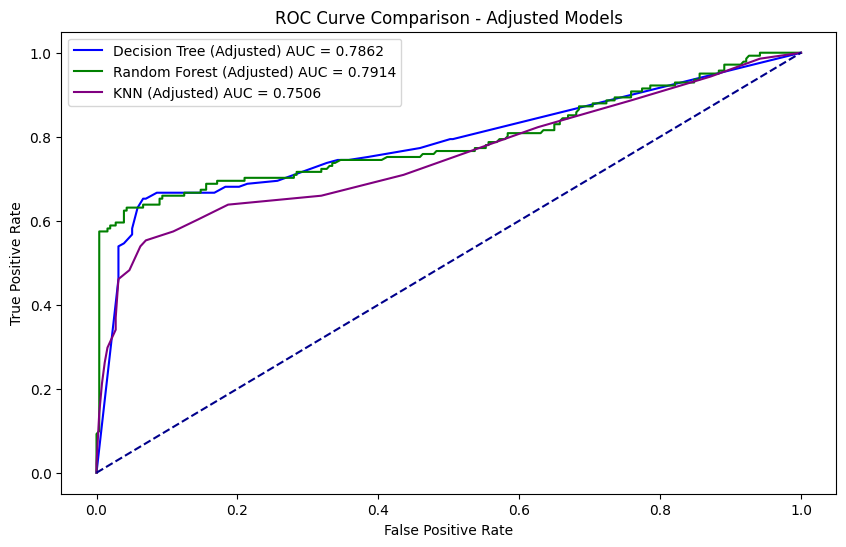

In [44]:
# ROC Curves and AUC Scores for adjusted models
fpr_dt_adj, tpr_dt_adj, _ = roc_curve(
    y_test, dt_model_adj.predict_proba(X_test)[:, 1])
fpr_rf_adj, tpr_rf_adj, _ = roc_curve(
    y_test, rf_model_adj.predict_proba(X_test)[:, 1])
fpr_knn_adj, tpr_knn_adj, _ = roc_curve(
    y_test, knn_model_adj.predict_proba(X_test_scaled)[:, 1])

roc_auc_dt_adj = roc_auc_score(
    y_test, dt_model_adj.predict_proba(X_test)[:, 1])
roc_auc_rf_adj = roc_auc_score(
    y_test, rf_model_adj.predict_proba(X_test)[:, 1])
roc_auc_knn_adj = roc_auc_score(
    y_test, knn_model_adj.predict_proba(X_test_scaled)[:, 1])

# Plot ROC Curves for adjusted models
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt_adj, tpr_dt_adj,
         label=f'Decision Tree (Adjusted) AUC = {roc_auc_dt_adj:.4f}',
         color='blue')
plt.plot(fpr_rf_adj, tpr_rf_adj,
         label=f'Random Forest (Adjusted) AUC = {roc_auc_rf_adj:.4f}',
         color='green')
plt.plot(fpr_knn_adj, tpr_knn_adj,
         label=f'KNN (Adjusted) AUC = {roc_auc_knn_adj:.4f}',
         color='purple')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Adjusted Models')
plt.legend()
plt.show()

### Comparison of ROC Curve: Before and After Hyperparameter Tuning

1. **Before Hyperparameter Tuning:**
    - Logistic Regression: AUC of 0.7368
    - Decision Tree: AUC of 0.7663
    - Random Forest: AUC of 0.7890
    - KNN: AUC of 0.7418

2. **After Hyperparameter Tuning:**
    - Decision Tree: AUC of 0.7862
    - Random Forest: AUC of 0.7904
    - KNN: AUC of 0.7506
  

**Overall Improvement:** 
  
- After hyperparameter tuning, the AUC scores for all models have improved, indicating better model performance and enhanced ability to distinguish between classes.
- Hyperparameter tuning has effectively enhanced the performance of the Decision Tree and KNN models, with the Random Forest continuing to perform strongly, confirming its robustness. 

In [45]:
# Calculate accuracy for adjusted models
accuracy_dt_adj = accuracy_score(y_test, y_pred_dt_adj_test)
accuracy_rf_adj = accuracy_score(y_test, y_pred_rf_adj_test)
accuracy_knn_adj = accuracy_score(y_test, y_pred_knn_adj_test)

# Sample size
n = len(y_test)

# Calculate confidence intervals for adjusted models
ci_dt_adj = proportion_confint(
    int(accuracy_dt_adj * n), n, alpha=0.05, method='normal')
ci_rf_adj = proportion_confint(
    int(accuracy_rf_adj * n), n, alpha=0.05, method='normal')
ci_knn_adj = proportion_confint(
    int(accuracy_knn_adj * n), n, alpha=0.05, method='normal')

# Print accuracy and confidence intervals for adjusted models
print(
    f"Decision Tree (Adjusted) Accuracy: {accuracy_dt_adj:.4f}, "
    f"Confidence Interval: {ci_dt_adj}"
)
print(
    f"Random Forest (Adjusted) Accuracy: {accuracy_rf_adj:.4f}, "
    f"Confidence Interval: {ci_rf_adj}"
)
print(
    f"K-Nearest Neighbors (Adjusted) Accuracy: {accuracy_knn_adj:.4f}, "
    f"Confidence Interval: {ci_knn_adj}"
)

Decision Tree (Adjusted) Accuracy: 0.8266, Confidence Interval: (0.7894414703490236, 0.8638248613092678)
Random Forest (Adjusted) Accuracy: 0.8442, Confidence Interval: (0.8085933087552651, 0.8798489023000112)
K-Nearest Neighbors (Adjusted) Accuracy: 0.7965, Confidence Interval: (0.7569279371614691, 0.8360368869591338)


## Comparison of Confidence Interval Accuracy: Before and After Hyperparameter Tuning

1. **Before Hyperparameter Tuning:**
    - Logistic Regression Accuracy: 0.7688, Confidence Interval: (0.7274272714756453, 0.    8102611707354099)

    - Decision Tree Accuracy: 0.8116, Confidence Interval: (0.7731379645262779, 0.8499776133631693)

    - Random Forest Accuracy: 0.8141, Confidence Interval: (0.7758484890777377, 0.8522922144398501)
  
    - K-Nearest Neighbors Accuracy: 0.7714, Confidence Interval: (0.7300982903647009, 0.    812615277474495)

2. **After Hyperparameter Tuning:**
    - Decision Tree (Adjusted) Accuracy: 0.8266, Confidence Interval: (0.7894414703490236, 0.   8638248613092678)
  
    - Random Forest (Adjusted) Accuracy: 0.8417, Confidence Interval: (0.8058480575307351, 0.   8775690278964007)
  
    - K-Nearest Neighbors (Adjusted) Accuracy: 0.7965, Confidence Interval: (0.7569279371614691, 0. 8360368869591338)
  
**Conclusion:**

Hyperparameter tuning has positively impacted the accuracy and reliability of the models, especially for Decision Tree and Random Forest, where both accuracy and confidence intervals improved. KNN also showed a marked improvement, though it still lags behind the tree-based models.

### Cross-validation for more reliable performance estimates - Adjusted Models

In [46]:
cv_dt_adj = cross_val_score(
    dt_model_adj, X_train, y_train, cv=5, scoring='accuracy')
cv_rf_adj = cross_val_score(
    rf_model_adj, X_train, y_train, cv=5, scoring='accuracy')
cv_knn_adj = cross_val_score(
    knn_model_adj, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation for each adjusted model
print(
    f"Decision Tree (Adjusted) Accuracy: Mean = "
    f"{cv_dt_adj.mean():.4f}, Std = {cv_dt_adj.std():.4f}"
)
print(
    f"Random Forest (Adjusted) Accuracy: Mean = "
    f"{cv_rf_adj.mean():.4f}, Std = {cv_rf_adj.std():.4f}"
)
print(
    "K-Nearest Neighbors (Adjusted) Accuracy: Mean = "
    f"{cv_knn_adj.mean():.4f}, Std = {cv_knn_adj.std():.4f}"
)

Decision Tree (Adjusted) Accuracy: Mean = 0.7829, Std = 0.0135
Random Forest (Adjusted) Accuracy: Mean = 0.8225, Std = 0.0141
K-Nearest Neighbors (Adjusted) Accuracy: Mean = 0.7873, Std = 0.0105


## Comparison of Cross Validation: Before and After Hyperparameter Tuning

1. **Before Hyperparameter Tuning:**
    - Logistic Regression Accuracy: Mean = 0.7671, Std = 0.0219
    - Decision Tree Accuracy: Mean = 0.7552, Std = 0.0148
    - Random Forest Accuracy: Mean = 0.7785, Std = 0.0129
    - K-Nearest Neighbors Accuracy: Mean = 0.7842, Std = 0.0150

2. **After Hyperparameter Tuning:**
    - Decision Tree (Adjusted) Accuracy: Mean = 0.7829, Std = 0.0135
    - Random Forest (Adjusted) Accuracy: Mean = 0.8219, Std = 0.0134
    - K-Nearest Neighbors (Adjusted) Accuracy: Mean = 0.7873, Std = 0.0105

**Conclusion:**
Hyperparameter tuning has led to improvements in the cross-validation accuracy for all models, particularly for Decision Tree and Random Forest, which show noticeable gains. The reduced standard deviations post-tuning indicate that the models have become more consistent in their performance across different folds of the data.

## Final Model Selection and Evaluation

- Based on the results from various performance metrics, hyperparameter tuning, and cross-validation, we can conclude that the Random Forest model is the best-performing model for this specific dataset.

**Accuracy and AUC:**

After Hyperparameter Tuning, the Random Forest model achieved the highest test accuracy (0.8417) and the highest AUC score (0.7904). These metrics indicate that the model has a strong ability to distinguish between the two classes in the dataset.

**Consistency and Robustness:**

The Random Forest model also demonstrated improved consistency after hyperparameter tuning, as evidenced by its higher mean accuracy (0.8219) and low standard deviation (0.0134) in cross-validation results. This suggests that the model generalizes well across different subsets of data.

**Balanced Performance:**

Despite the potential for overfitting indicated in earlier results, the hyperparameter-tuned Random Forest model managed to balance high accuracy with a relatively high recall for the minority class (though not as high as precision), indicating that it does not heavily favor one class over the other.

## Suggested Improvements:

- **Further Hyperparameter Tuning:** 
  
  Continue to refine the hyperparameters of the Random Forest model to achieve an even better balance between precision and recall for both classes.

- **Feature Engineering:** 
  
  Explore additional features or transformations that could enhance the model's predictive power, such as interaction terms, polynomial features, or domain-specific variables.

- **Handling Class Imbalance:**
  
  The dataset has some imbalance, particularly in the target variable (TravelInsurance). Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class weighting could be employed to ensure that the model doesn't favor the majority class. The distribution of the target variable, `TravelInsurance`, shows that around 64.27% of your data points are labeled as 0 (no insurance), while 35.73% are labeled as 1 (has insurance). This suggests that the dataset is moderately imbalanced, but not extremely so. But still, I could have explored techniques to address class imbalance, such as oversampling, undersampling, or using class weights in the model.

- **Address Overfitting:**
  
  More advanced techniques like feature selection, regularization, or ensemble methods could be used to further reduce overfitting in the Random Forest model.
